In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
inputs = np.expand_dims(np.arange(-1.5, 1.5, 0.01), axis=1)
targets = np.sinc(5 * inputs)

In [3]:
print(f"Input shape: {inputs.shape}")
print(f"Target shape: {targets.shape}")

Input shape: (300, 1)
Target shape: (300, 1)


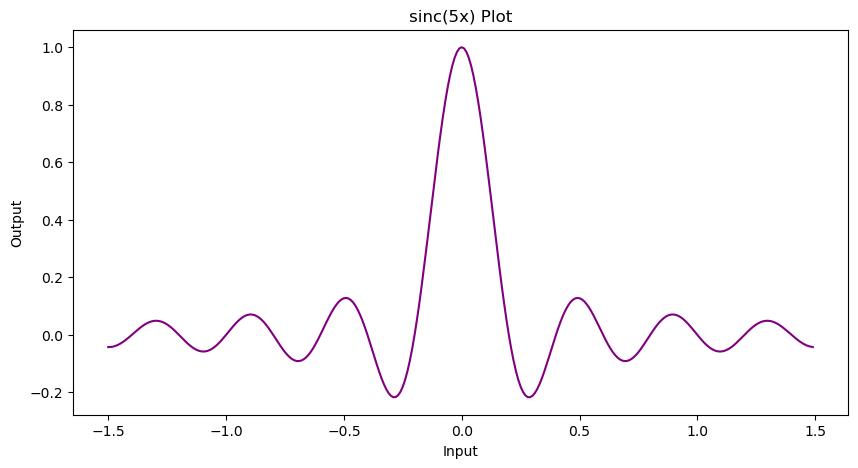

In [12]:
# Converting NumPy arrays to PyTorch tensors
inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
targets_tensor = torch.tensor(targets, dtype=torch.float32)

# Plot the sinc() function
plt.figure(figsize=(10, 5))
plt.plot(inputs_tensor, targets_tensor, color="purple")
plt.title('sinc(5x) Plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [5]:
class SincModel(nn.Module):
    def __init__(self):
        super(SincModel, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 8)
        self.fc3 = nn.Linear(8, 16)
        self.fc4 = nn.Linear(16, 10)
        self.fc5 = nn.Linear(10, 7)
        self.fc6 = nn.Linear(7, 5)
        self.fc7 = nn.Linear(5, 3)
        self.fc8 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.leaky_relu(self.fc3(x))
        x = nn.functional.leaky_relu(self.fc4(x))
        x = nn.functional.leaky_relu(self.fc5(x))
        x = nn.functional.leaky_relu(self.fc6(x))
        x = nn.functional.leaky_relu(self.fc7(x))
        return self.fc8(x)

In [6]:
# Instantiate model and check total parameters
model = SincModel()
total_params = sum(p.numel() for p in model.parameters())
print(f'Total Parameters: {total_params}')

Total Parameters: 511


In [7]:
# Define training function
def train(model, inputs, targets, lr=1e-3, weight_decay=1e-5, epochs=4000):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_func = nn.MSELoss()

    loss_history = []
    epoch_history = []
    grad_history = []
    converged = False

    print("Starting training...")

    for epoch in range(epochs):
        if converged:
            break
        
        # Forward pass
        predictions = model(inputs)
        loss = loss_func(predictions, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track progress
        loss_history.append(loss.item())
        epoch_history.append(epoch)

        # Calculate gradient norm
        grad_norm = np.sqrt(sum((p.grad ** 2).sum().item() for p in model.parameters() if p.grad is not None))
        grad_history.append(grad_norm)

        if epoch % 400 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

        # Check for convergence
        if epoch > 5 and loss_history[-1] < 0.001:
            if abs(loss_history[-3] - loss_history[-2]) < 1e-5 and abs(loss_history[-2] - loss_history[-1]) < 1e-5:
                print(f"Converged at Epoch {epoch}: Loss = {loss_history[-1]:.6f}")
                converged = True

    print("Training Completed")
    return epoch_history, loss_history, predictions, grad_history

Starting training...
Epoch 0: Loss = 0.4404
Epoch 400: Loss = 0.0620
Epoch 800: Loss = 0.0529
Epoch 1200: Loss = 0.0048
Epoch 1600: Loss = 0.0041
Epoch 2000: Loss = 0.0034
Epoch 2400: Loss = 0.0032
Epoch 2800: Loss = 0.0032
Epoch 3200: Loss = 0.0031
Epoch 3600: Loss = 0.0031
Training Completed


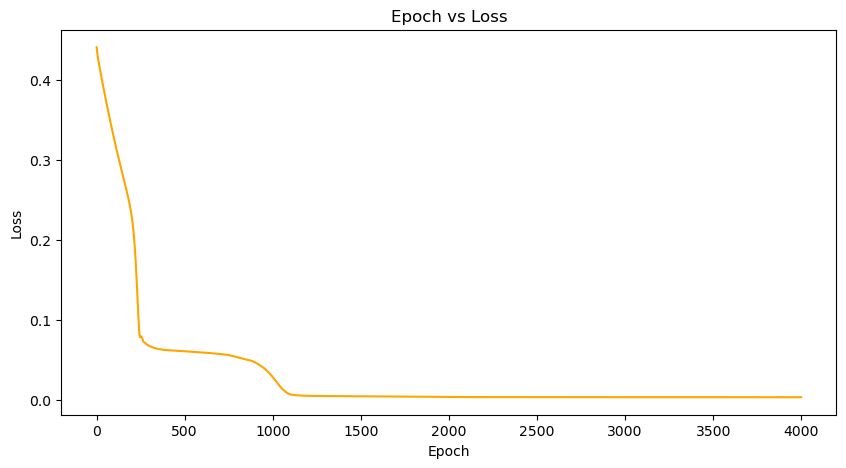

In [8]:
# Train the model
epochs, losses, predictions, gradients = train(model, inputs_tensor, targets_tensor)

# Plot Epoch vs Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, losses, color="orange")
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

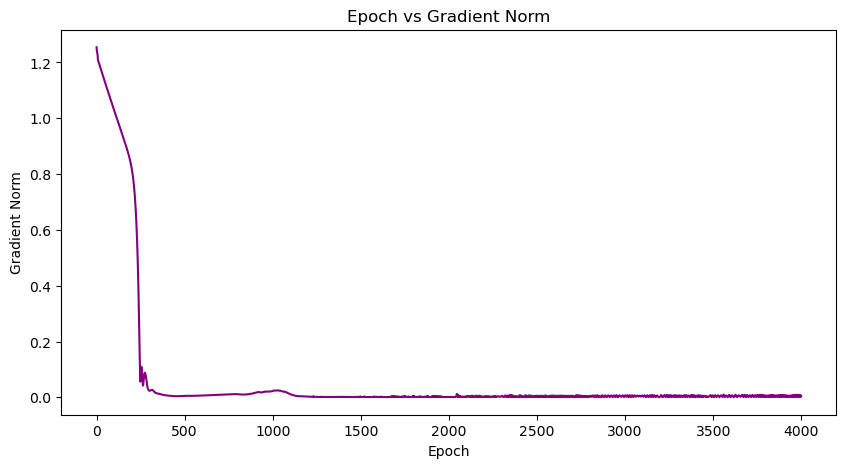

In [9]:
# Plotting Epoch vs Gradient Norm
plt.figure(figsize=(10, 5))
plt.plot(epochs, gradients, color="purple")
plt.title('Epoch vs Gradient Norm')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.show()


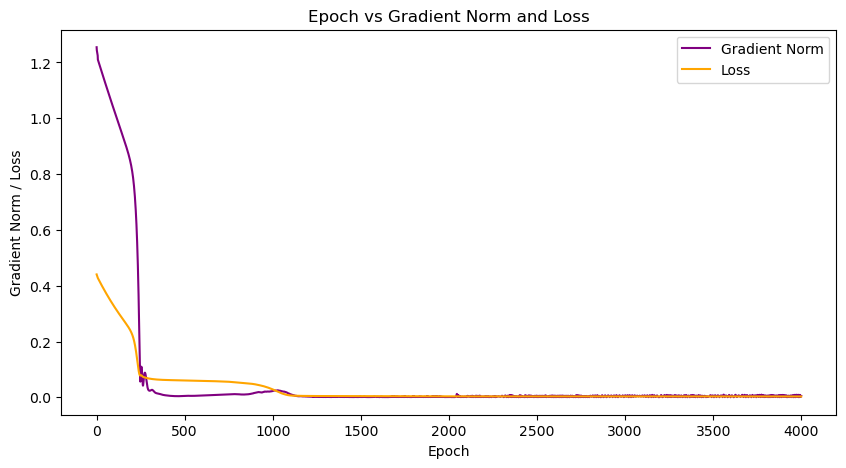

In [10]:
# Plot Epoch vs Gradient Norm and Loss on the same graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, gradients, color="purple", label='Gradient Norm')
plt.plot(epochs, losses, color="orange", label='Loss')
plt.title('Epoch vs Gradient Norm and Loss')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm / Loss')
plt.legend()
plt.show()
